# Support Vector Regression

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [135]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# load dataset
df = pd.read_csv("monthly_IBM.csv")

# convert timestamp column to datetime and extract the month and year
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y')
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

# create X and y variables for training
X = df[['month','year']]
y = df['volume']


scaler = StandardScaler()
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create the SVR model and fit it to the training data
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'epsilon':[0.1,0.2]}
svr = SVR()
svr.fit(X_train, y_train)
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
# svr = SVR()
# svr.fit(X_train, y_train)

# make predictions on the test set
y_pred = svr.predict(X_test)

# calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


Mean Squared Error:  2547389233513691.0


In [142]:
predict_1 = svr.predict([[9,2023]])

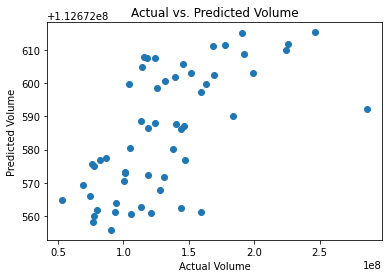

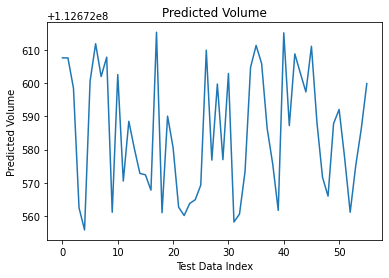

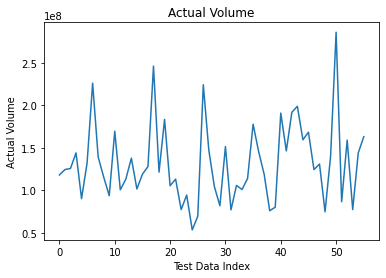

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# create a scatter plot of the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Volume")
plt.ylabel("Predicted Volume")
plt.title("Actual vs. Predicted Volume")
plt.show()

# create a line plot of the predicted values
plt.plot(y_pred)
plt.xlabel("Test Data Index")
plt.ylabel("Predicted Volume")
plt.title("Predicted Volume")
plt.show()

plt.plot(range(len(y_test)), y_test)
plt.xlabel("Test Data Index")
plt.ylabel("Actual Volume")
plt.title("Actual Volume")
plt.show()


In [138]:
X_new = [[1, 2023]]
volume_prediction = svr.predict(X_new)
print(volume_prediction)

[1.12672587e+08]
